
# 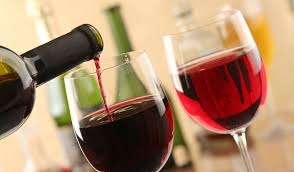

# Prediction of Quality of Wine


### Index:

### 1.Introduction

### 2.Objective

### 3.Dataset Description

### 4.Exploratory Data Analysis

### 5.Implementation

### 6.Results

### 7.Evaluation

### 8.Citations



## Introduction:

In recent years, most of the industries promoting their products based on the quality certification they received on the products. The traditional way of assessing the product quality is time consuming, however with the invent of machine learning techniques the processes has become more efficient and consumed less time than before. Although most of the chemicals are same for different type of wine based on the chemical tests, the quantity of each chemicals have different level of concentration for different type of wine. These days it is really important to classify different wine for quality assurance.


## Objective: 

The purpose of this project is to predict human wine taste preferences that are based on easily available analytical tests at the certification step. The model developed will be useful to support the oenologist wine tasting evaluations and improve wine production. The implementation of the technique will help in target marketing by modelling consumer tastes from niche markets.


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

## Dataset:

Describing the Data:
The dataset is related to red variants of the Portuguese "Vinho Verde" wine.Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


### Loading the  Red Wine dataset
The data set is from the 'UCI Machine Learning Repository'.
Here, we can use the read_csv() from the pandas library to load data into dataframe 

In [68]:
#Loading dataset
wine_data = pd.read_csv("C:/Users/admin/Desktop/ABI/PROJECT/winequality-red.csv")

### The head(..) function of pandas helps in viewing the preview of the dataset for n-number of rows

In [69]:
#Let's check how the data is distributed
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploration of the dataset:

In [70]:
print("Shape of Red Wine dataset: {s}".format(s = wine_data.shape))
print("Column headers/names: {s}".format(s = list(wine_data)))

Shape of Red Wine dataset: (1599, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


From above lines we can learn that there are total 1599 observations with 12 different feature variables/attributes present in the Red Wine dataset.

### Information about different variables/column from the dataset:

In [71]:
#Information about the data columns
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see that, all 12 columns are of numeric data types.

Out of 12 variables, 11 are predictor variables and last one 'quality' is an response variable.


### Summary of the dataset:

In [72]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).

All the data seems to be in range (with different scales, which needs standardization).


### Checking for the missing values in  wine dataset:

In [73]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The red wine dataset doesn't have any missing values/rows/cells for any of the variables/feature.

It seems that data has been collected neatly  before publishing the dataset.
 
 
 ### Renaming the dataset headers:
 Rename by modifying the dataset headers/column names by removing the 'blank spaces' from it.

In [74]:
wine_data.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine_data.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### How many unique values does the target feature 'quality' has?

In [75]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### How data is distributed among those values?

In [76]:
wine_data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

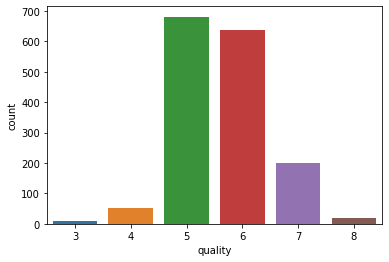

In [77]:
sns.countplot(x='quality', data=wine_data)

The above distribution shows the range for response variable (quality) is between 3 to 8.

Let's create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.

i.e.  bad: 1-4
      average: 5-6
      good: 7-10

In [78]:
conditions = [
    (wine_data['quality'] >= 7),
    (wine_data['quality'] <= 4)
]
rating = ['good', 'bad']
wine_data['rating'] = np.select(conditions, rating, default='average')
wine_data.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [81]:
wine_data.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


### Correlation between features/variables:
Let's check the corelation between the target variable and predictor variables,

In [82]:
correlation = wine_data.corr()
plt.figure(figsize=(14,8)
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

SyntaxError: invalid syntax (<ipython-input-82-c794fa92eff0>, line 3)

In [65]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

We can observe that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'.

This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

### Analysis of alcohol percentage with wine quality:

[Text(0, 0.5, 'Fixed Acidity Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Fixed Acidity percent in different wine quality types')]

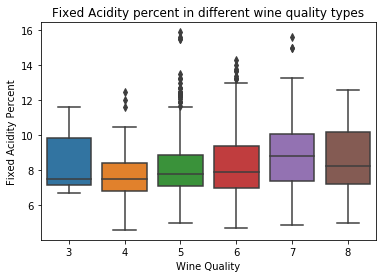

In [17]:
bx = sns.boxplot(x="quality", y='fixed_acidity', data = wine_data)
bx.set(xlabel='Wine Quality', ylabel='Fixed Acidity Percent', title='Fixed Acidity percent in different wine quality types')

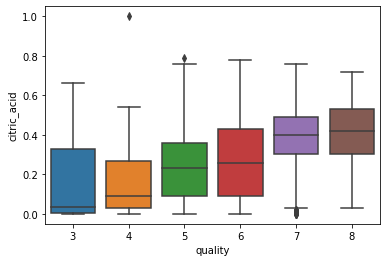

In [18]:
bx = sns.boxplot(x="quality", y='citric_acid', data = wine_data)

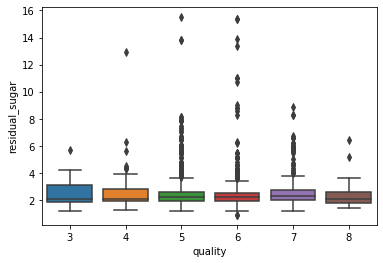

In [19]:
bx = sns.boxplot(x="quality", y='residual_sugar', data = wine_data)

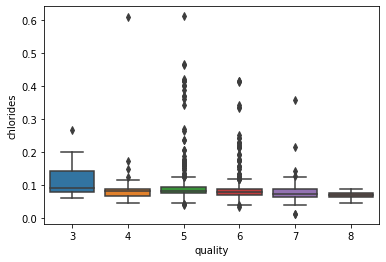

In [20]:
bx = sns.boxplot(x="quality", y='chlorides', data = wine_data)

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ')]

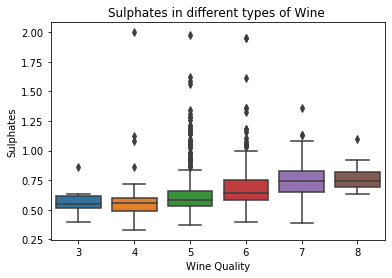

In [21]:
bx = sns.boxplot(x="quality", y='sulphates', data = wine_data)
bx.set(xlabel='Wine Quality', ylabel='Sulphates', title='Sulphates in different types of Wine ')

[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Xitric_acid in different types of Wine ratings')]

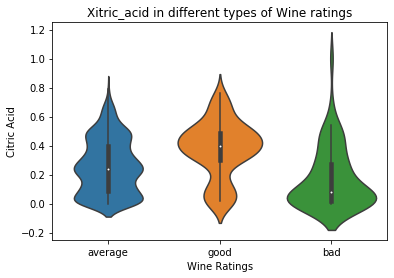

In [22]:
bx = sns.violinplot(x="rating", y='citric_acid', data = wine_data)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Xitric_acid in different types of Wine ratings')

[Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

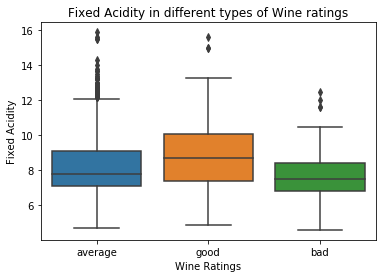

In [23]:
bx = sns.boxplot(x="rating", y='fixed_acidity', data = wine_data)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

[Text(0, 0.5, 'pH'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

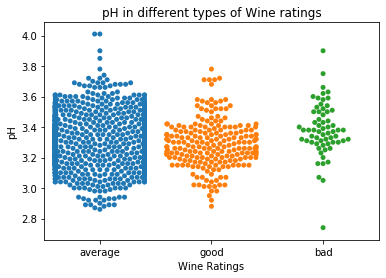

In [24]:
bx = sns.swarmplot(x="rating", y="pH", data = wine_data);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

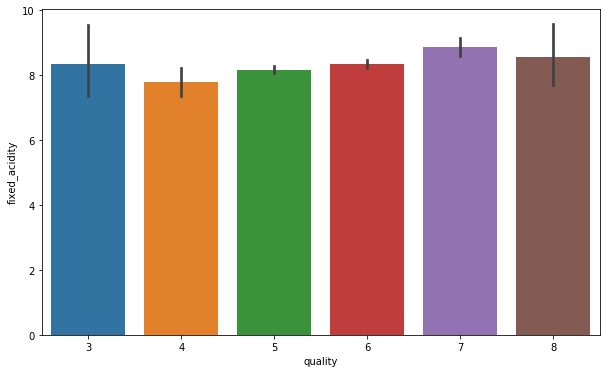

In [25]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine_data)

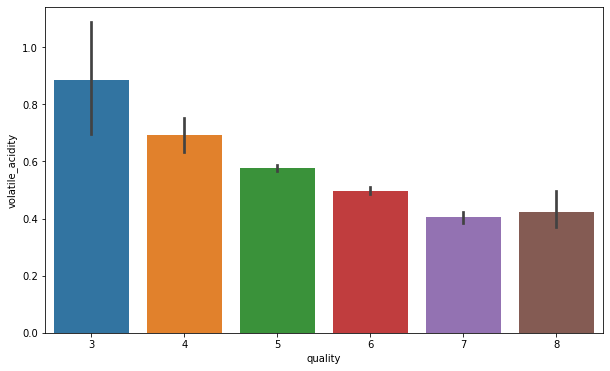

In [26]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = wine_data)

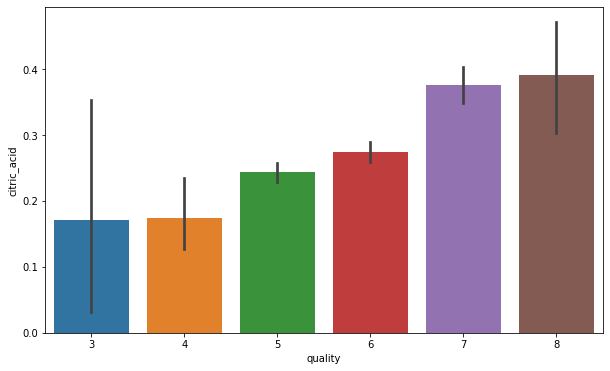

In [27]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine_data)

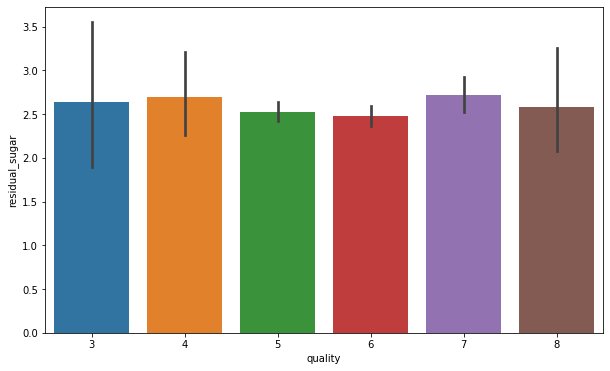

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = wine_data)

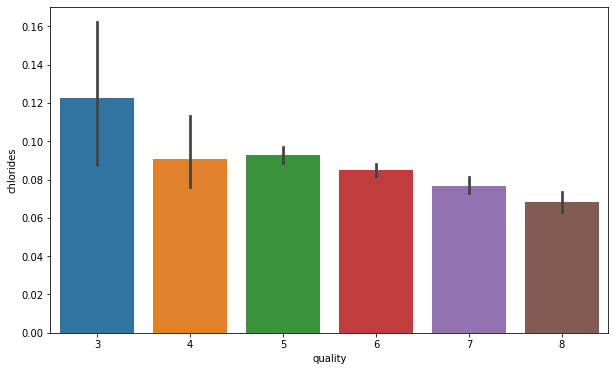

In [29]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data)

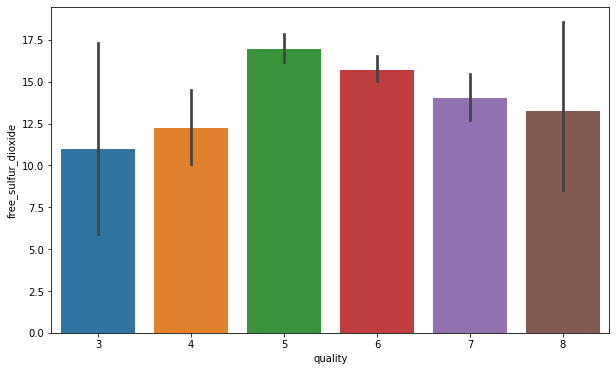

In [30]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = wine_data)

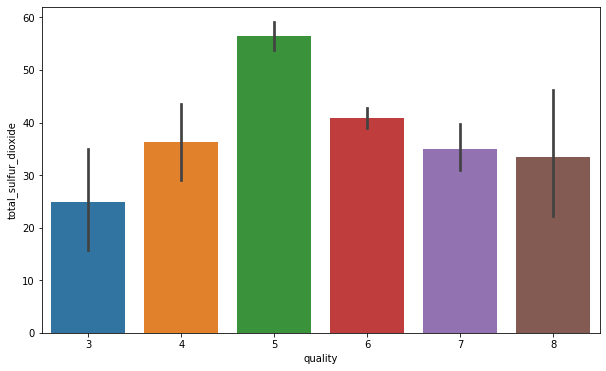

In [31]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = wine_data)

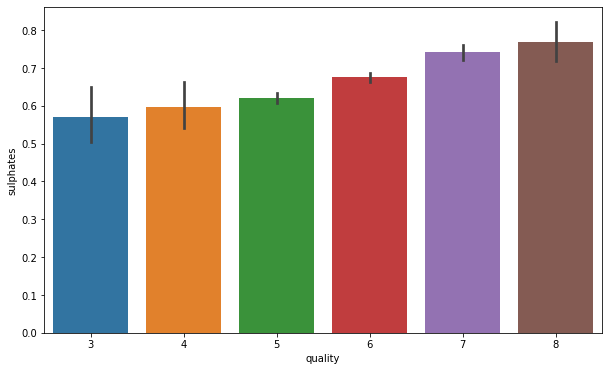

In [32]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)

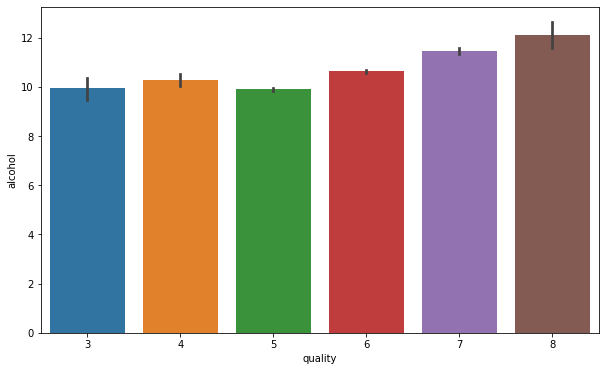

In [33]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_data)

## Preprocessing the Data

In [34]:
reviews = []
for i in wine_data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
wine_data['Reviews'] = reviews

In [35]:
x = wine_data.iloc[:,:11]
y = wine_data['Reviews']

In [36]:
x.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [37]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [84]:
#view the scaled features
print(x)


[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [40]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

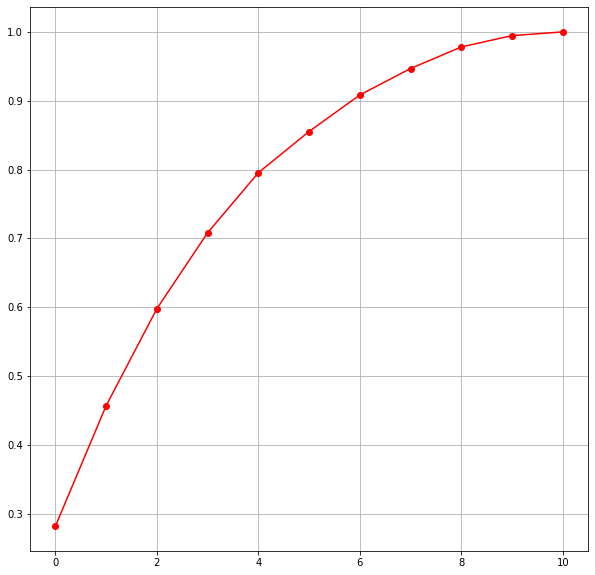

In [41]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [42]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [43]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [44]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1199, 8)
(1199,)
(400, 8)
(400,)


In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=Warning)
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC(gamma="auto")
lin_svc.fit(x_train, y_train)
lin_svc_predict=lin_svc.predict(x_test)

In [47]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_predict)
lin_svc_acc_score = accuracy_score(y_test, lin_svc_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[  0   2   0]
 [  0 393   0]
 [  0   5   0]]
98.25


98.75% accuracy wit RBF Kernel!  Let's try the linear kernel now and see if it improves our accuracy in any way.

In [48]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc_predict=rbf_svc.predict(x_test)

In [49]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rbf_svc_predict)
rbf_svc_acc_score = accuracy_score(y_test, rbf_svc_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[  0   2   0]
 [  0 393   0]
 [  0   5   0]]
98.25


In [50]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(lin_svc, param_grid=param, scoring='accuracy', cv=10)

In [51]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [52]:
grid_svc.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [53]:
svc2 = SVC(C = 1.3, gamma =  1.4, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.98      1.00      0.99       393
           3       0.00      0.00      0.00         5

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.97      0.98      0.97       400



## Citations

https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

https://ieeexplore.ieee.org/document/8702017

https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

